<a href="https://colab.research.google.com/github/arthursoars/Projeto-ICD/blob/main/Projeto_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise das Emissões de CO₂: Tendências Globais, Impactos de Políticas Ambientais e Comparação entre Principais Emissores**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression




In [23]:
# Carregar o dataset original (antes da limpeza)
df_original = pd.read_csv('/content/GCB2022v27_MtCO2_flat.csv')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [24]:
# Caminho para o arquivo CSV no Google Drive
file_path = '/content/GCB2022v27_MtCO2_flat.csv'  # Se não funcionar veja se o caminho esta certo.

In [25]:
# Função para carregar, preparar e limpar o DataFrame
def load_and_clean_data(file_name):
    # Carrega o arquivo CSV no DataFrame
    df = pd.read_csv(file_name)

    # Remove apenas as linhas onde a coluna 'Total' possui valores NaN ou 0
    df_cleaned = df[df['Total'].notna() & (df['Total'] > 0)]

    # Retorna o DataFrame limpo
    return df_cleaned


In [26]:
# Atribui o Dataframe filtrado para uma variável
df_cleaned = load_and_clean_data(file_path)
# Exibe as 10 primeiras linhas
df_cleaned

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
199,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.000000,0.000000,0.000000,NaN,NaN
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.000000,0.000000,0.000000,NaN,0.011266
201,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.000000,0.000000,0.000000,NaN,0.012098
202,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.000000,0.000000,0.000000,NaN,0.011946
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.000000,0.000000,0.000000,NaN,0.013685
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [27]:
# Filtrando os dados para o Brasil
df_brazil = df_cleaned[df_cleaned['Country'] == 'Brazil']
df_brazil

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
7495,Brazil,BRA,1901,2.103136,2.103136,0.000000,0.000000,NaN,0.000,NaN,NaN
7496,Brazil,BRA,1902,2.506176,2.506176,0.000000,0.000000,NaN,0.000,NaN,NaN
7497,Brazil,BRA,1903,2.440224,2.440224,0.000000,0.000000,NaN,0.000,NaN,NaN
7498,Brazil,BRA,1904,2.619760,2.619760,0.000000,0.000000,NaN,0.000,NaN,NaN
7499,Brazil,BRA,1905,2.799296,2.799296,0.000000,0.000000,NaN,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7611,Brazil,BRA,2017,497.412678,67.321878,316.425222,70.687790,19.080788,17.505,6.392,2.385616
7612,Brazil,BRA,2018,477.102130,65.840737,300.605153,67.417072,19.342169,17.505,6.392,2.270114
7613,Brazil,BRA,2019,475.104581,61.887745,302.333585,67.121321,19.864930,17.505,6.392,2.243357
7614,Brazil,BRA,2020,442.306003,56.240806,281.089414,59.026096,22.052686,17.505,6.392,2.074642


In [28]:
# Criação de um df para os dados globais
df_global = df_cleaned[df_cleaned['Country'] == 'Global']
df_global

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [29]:
## Calcular os maiores emissores, removendo o "Global"
# Foi calculado o total de todos os anos
top_5_countries = df_cleaned[df_cleaned['Country'] != 'Global'].groupby("Country")['Total'].sum().sort_values(ascending=False).head(5)
top_5_countries

,Total
Country,
USA,421906.855203
China,249352.817660
Russia,117547.631435
Germany,93290.503809
United Kingdom,78508.720102


In [30]:
# Criação de um novo df para cada um dos cinco maiores emissores
df_usa = df_cleaned[df_cleaned['Country'] == 'USA']
df_china = df_cleaned[df_cleaned['Country'] == 'China']
df_russia = df_cleaned[df_cleaned['Country'] == 'Russia']
df_germany = df_cleaned[df_cleaned['Country'] == 'Germany']
df_uk = df_cleaned[df_cleaned['Country'] == 'United Kingdom']

In [31]:
# Lista dos novos cinco maiores emissores
top_5_countries = ['USA', 'China', 'Russia', 'Germany', 'United Kingdom']

# Criando um dataset apenas dos novos cinco maiores emissores
df_top_emitters = df_cleaned[df_cleaned['Country'].isin(top_5_countries)]

# Exibir o novo DataFrame
df_top_emitters


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10765,China,CHN,1907,19.893871,19.893871,0.000000,0.000000,NaN,0.000000,NaN,0.047826
10766,China,CHN,1908,22.735853,22.735853,0.000000,0.000000,NaN,0.000000,NaN,0.054353
10767,China,CHN,1909,24.251576,24.251576,0.000000,0.000000,NaN,0.000000,NaN,0.057654
10768,China,CHN,1910,25.009438,25.009438,0.000000,0.000000,NaN,0.000000,NaN,0.059124
10769,China,CHN,1911,24.630507,24.630507,0.000000,0.000000,NaN,0.000000,NaN,0.057593
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


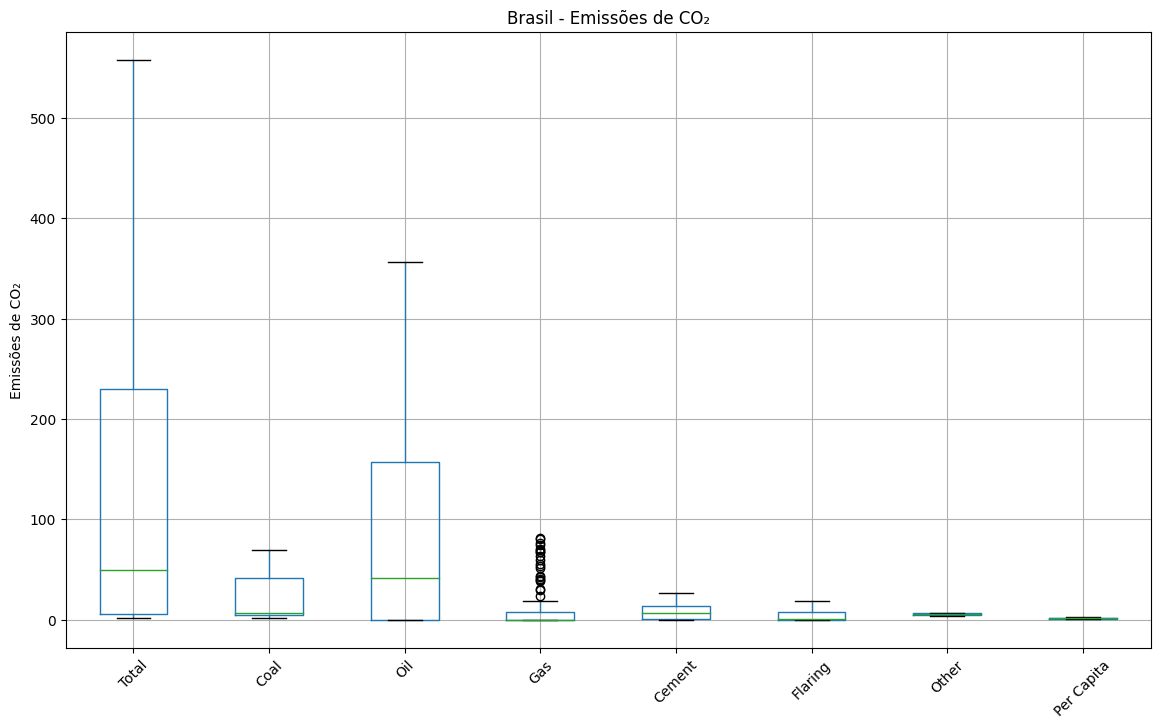

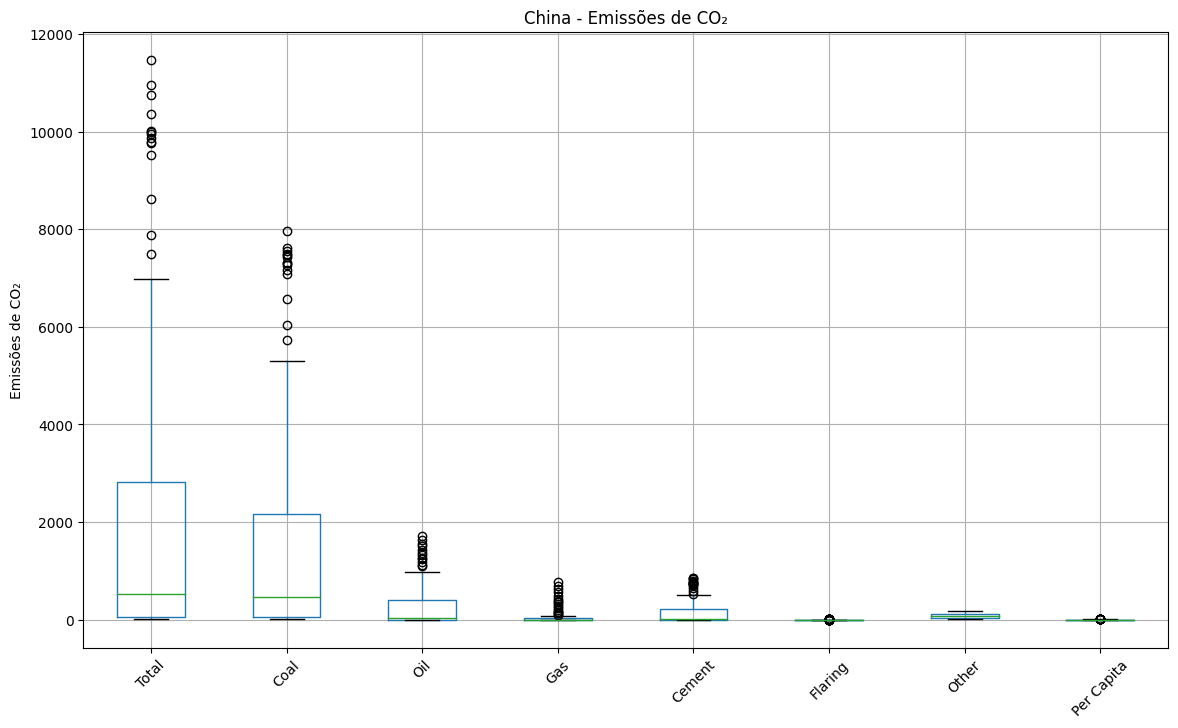

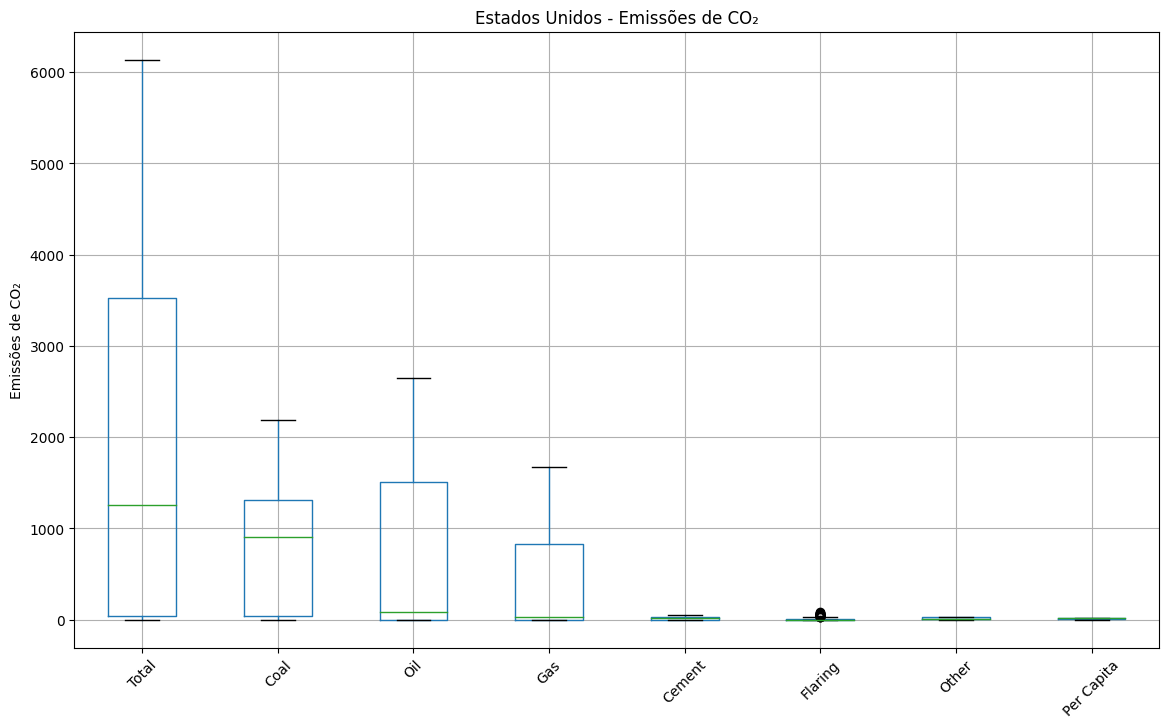

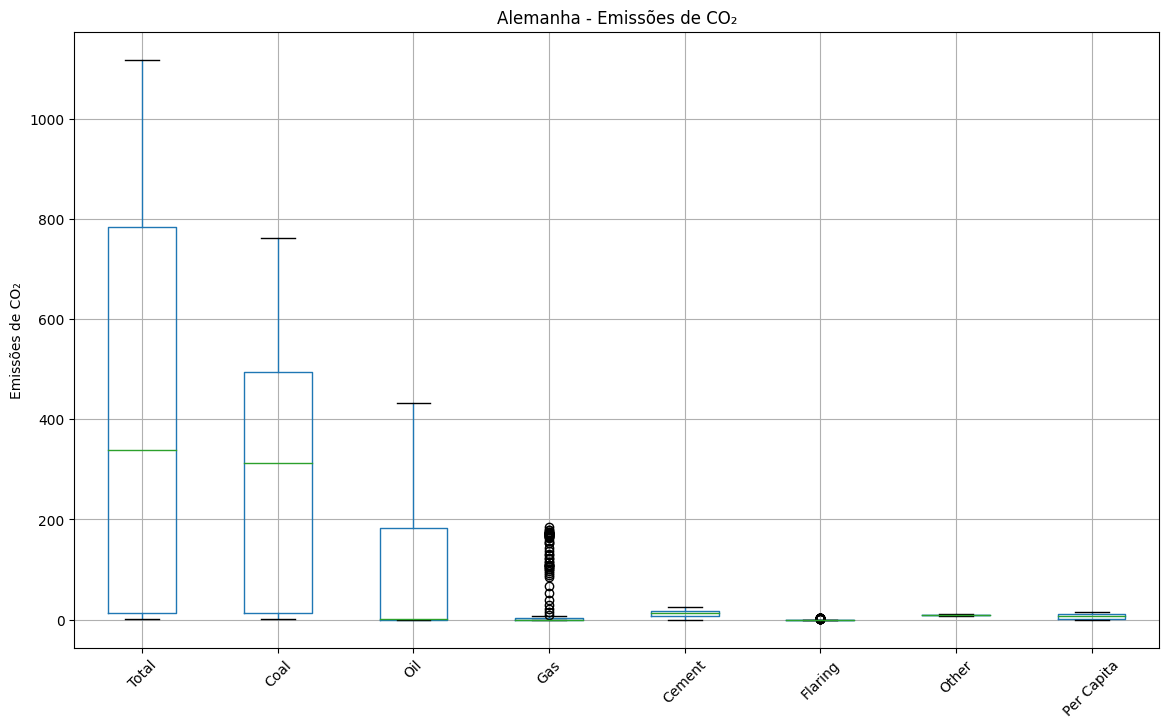

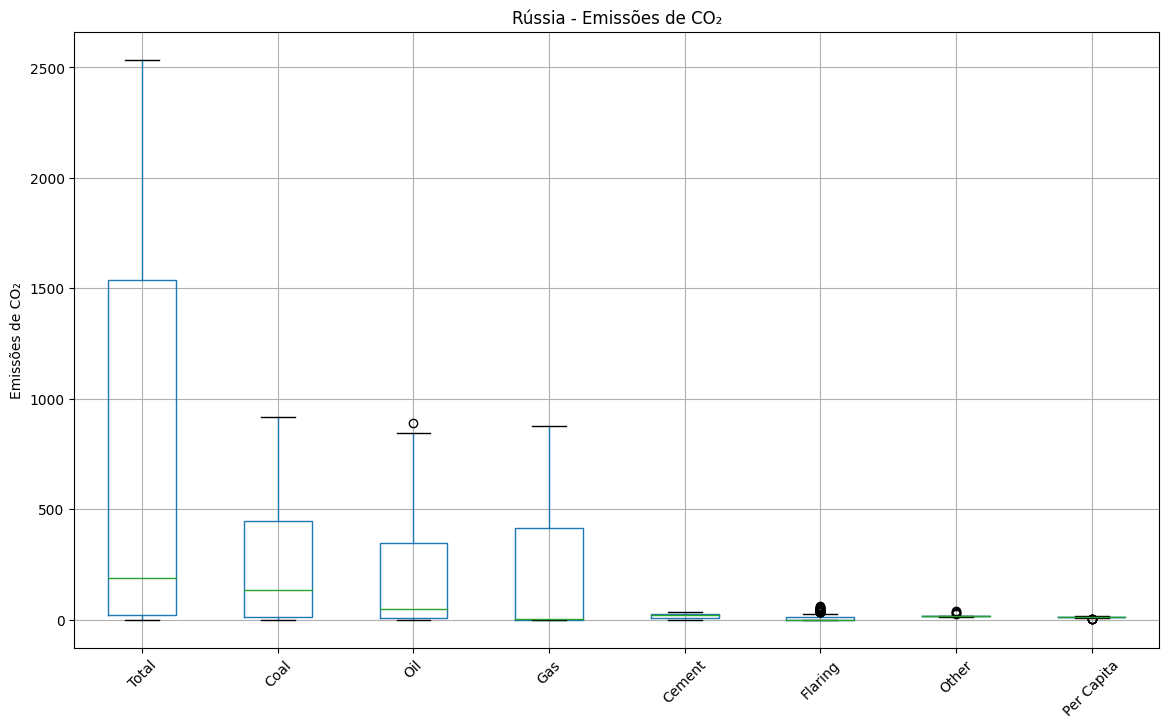

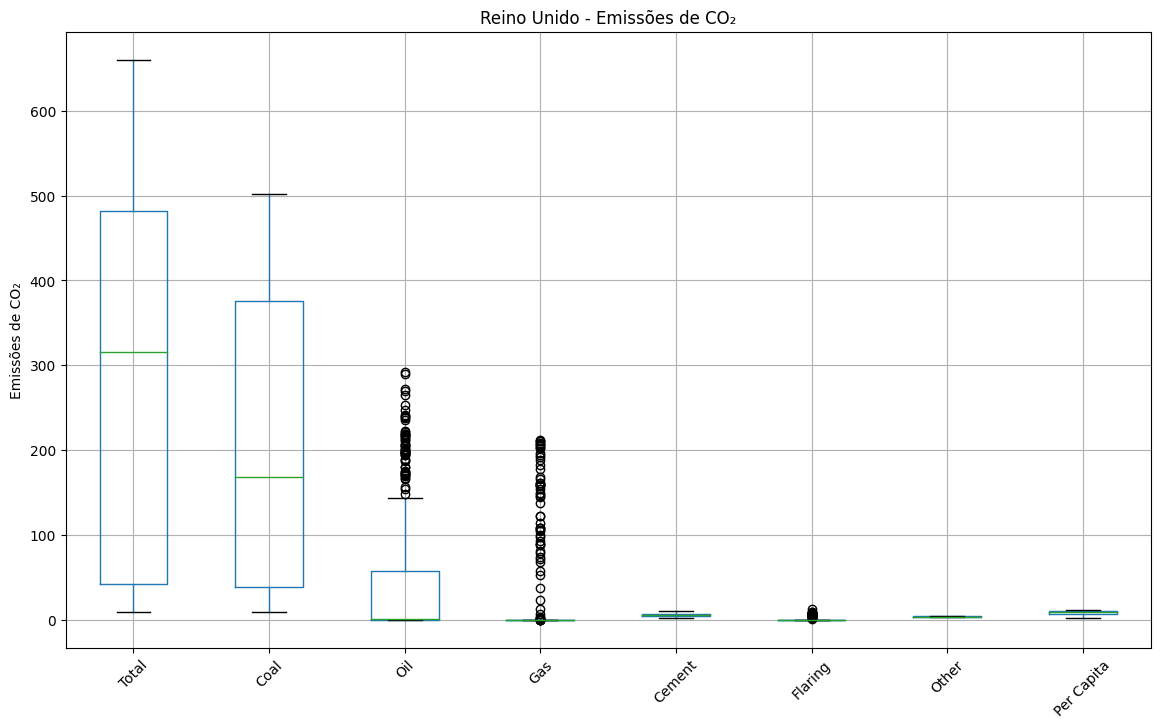

In [32]:
# Função para gerar boxplots para um país específico
def create_country_boxplot(df_pais, country_name):
    # Filtrar apenas colunas numéricas e remover colunas que tenham todos os valores ausentes
    numeric_columns = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']
    numeric_df = df_pais[numeric_columns].dropna(axis=1, how='all')

    # Criar o boxplot
    plt.figure(figsize=(14, 8))
    numeric_df.boxplot()
    plt.title(f'{country_name} - Emissões de CO₂')
    plt.xticks(rotation=45)
    plt.ylabel('Emissões de CO₂')
    plt.grid(True)
    plt.show()

# Criar boxplot para o Brasil
create_country_boxplot(df_brazil, 'Brasil')

# Criar boxplot para a China
create_country_boxplot(df_china, 'China')

# Criar boxplot para os EUA
create_country_boxplot(df_usa, 'Estados Unidos')

# Criar boxplot para a Alemanha
create_country_boxplot(df_germany, 'Alemanha')

# Criar boxplot para a Rússia
create_country_boxplot(df_russia, 'Rússia')

# Criar boxplot para o Reino Unido
create_country_boxplot(df_uk, 'Reino Unido')


In [33]:
# Função para calcular medidas de centralidade e dispersão
def calculate_statistics(df):
    stats = df.describe()  # Calcula estatísticas básicas
    iqr = df.quantile(0.75) - df.quantile(0.25)  # Intervalo Interquartil (IQR)
    stats.loc['IQR'] = iqr  # Adiciona o valor do IQR como uma nova linha (IQR) ao DataFrame stats gerado por describe().
    return stats

# Calcular medidas de centralidade e dispersão para cada dataset
global_stats = calculate_statistics(df_global[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']])
brazil_stats = calculate_statistics(df_brazil[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']])
top_emitters_stats = calculate_statistics(df_top_emitters[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']])

# Visualização das medidas de centralidade e dispersão das variáveis disponíveis
print("Medidas de Centralidade e Dispersão - Dados Globais (df_global):")
print(global_stats)
print("\n\nMedidas de Centralidade e Dispersão dos Cinco Maiores Emissores (df_top_emitters):")
print(top_emitters_stats)
print("\nMedidas de Centralidade e Dispersão - Brasil (df_brazil):")
print(brazil_stats.head())


Medidas de Centralidade e Dispersão - Dados Globais (df_global):
              Total          Coal           Oil          Gas       Cement  \
count    272.000000    272.000000    167.000000   140.000000   142.000000   
mean    6385.772167   2956.581079   3625.609201  1814.698722   317.372713   
std    10124.917164   3944.631584   4430.704084  2326.854738   453.690038   
min        9.350528      9.350528      0.036640     0.164880     0.000172   
25%       49.590408     49.590408     54.051075    36.137395     0.148120   
50%     1017.573406    991.485678    821.515974   431.635690    71.409084   
75%     6683.314570   4047.788751   8443.334578  3167.370656   435.955032   
max    37123.850352  15051.512770  12345.653374  7921.829472  1672.592372   
IQR     6633.724162   3998.198343   8389.283503  3131.233261   435.806912   

          Flaring       Other  Per Capita  
count   72.000000   32.000000  272.000000  
mean   256.309522  251.782569    1.494845  
std    114.017646   35.326736   

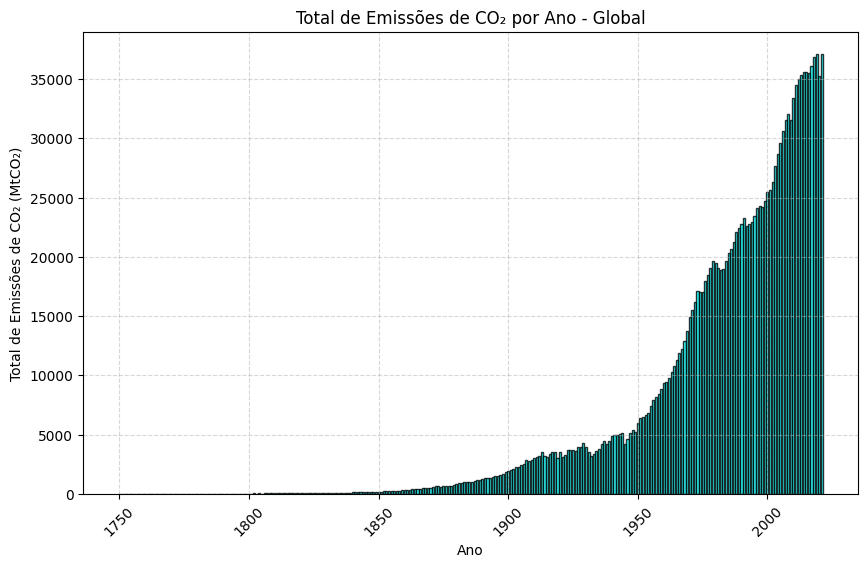

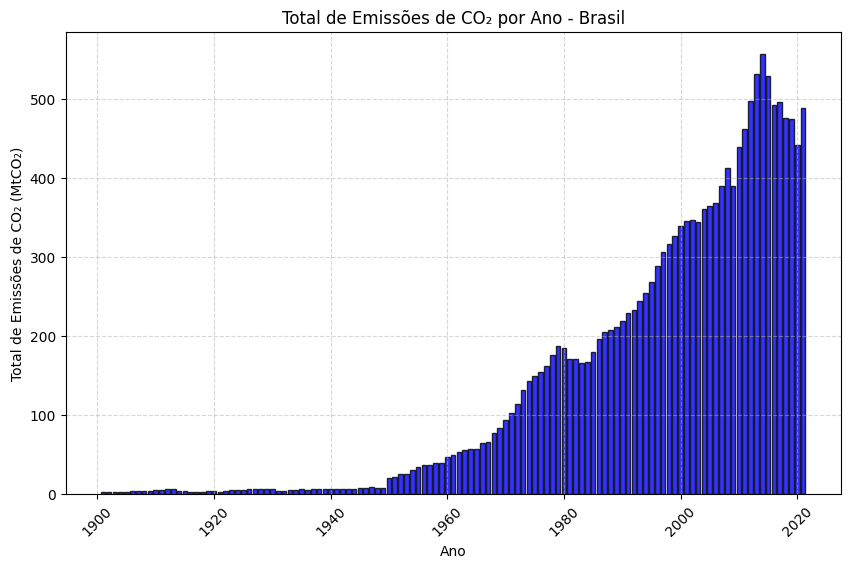

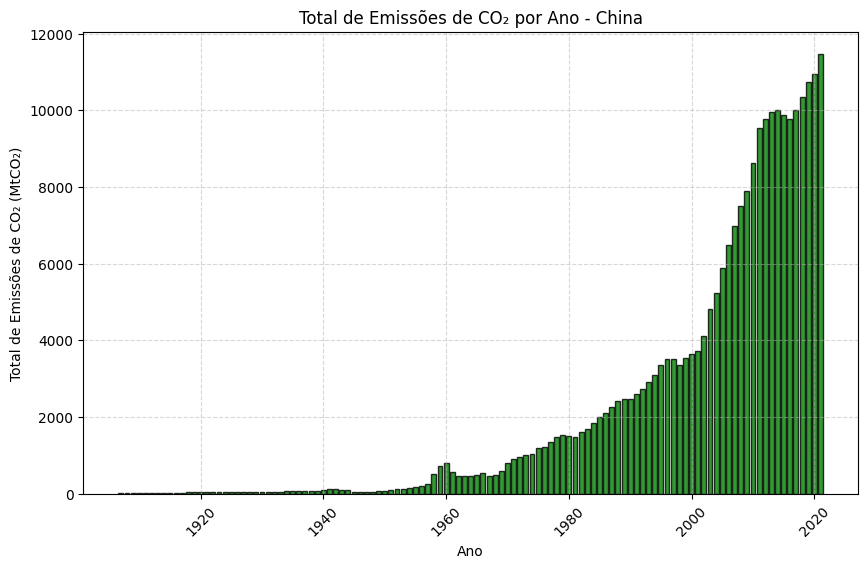

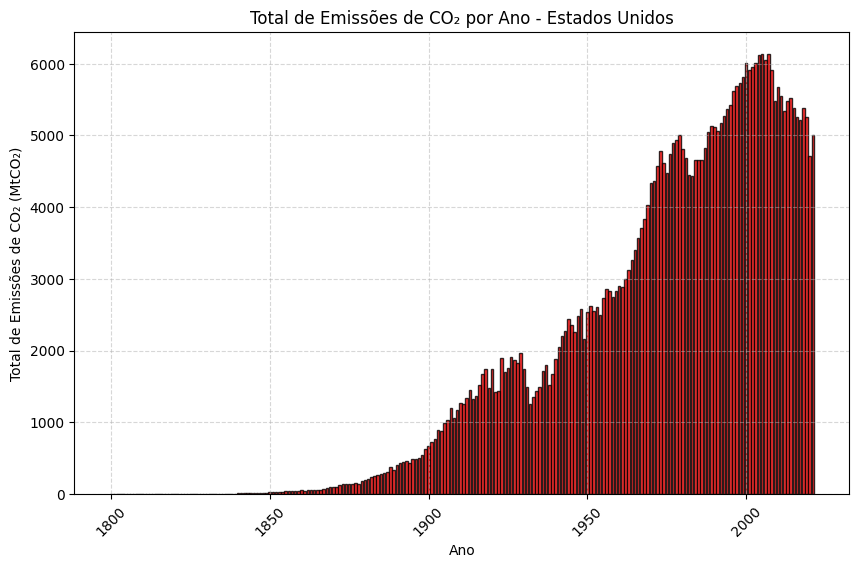

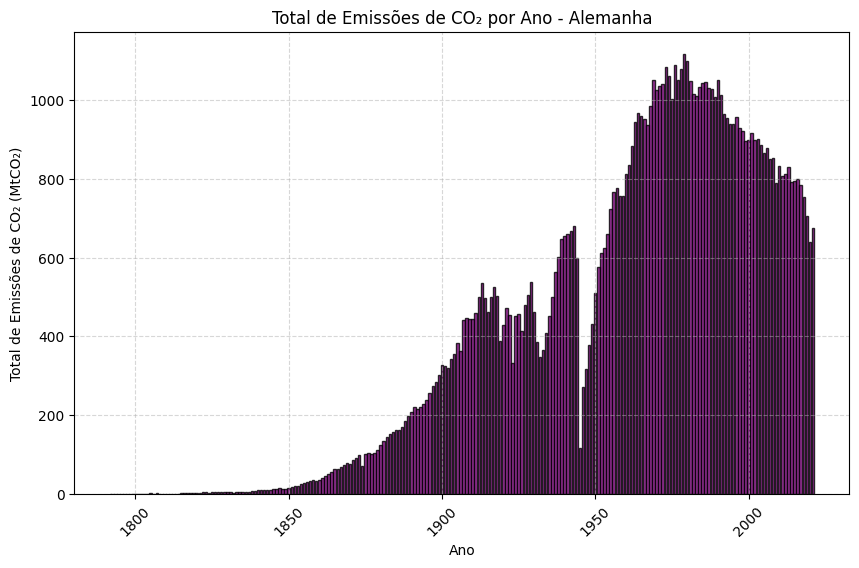

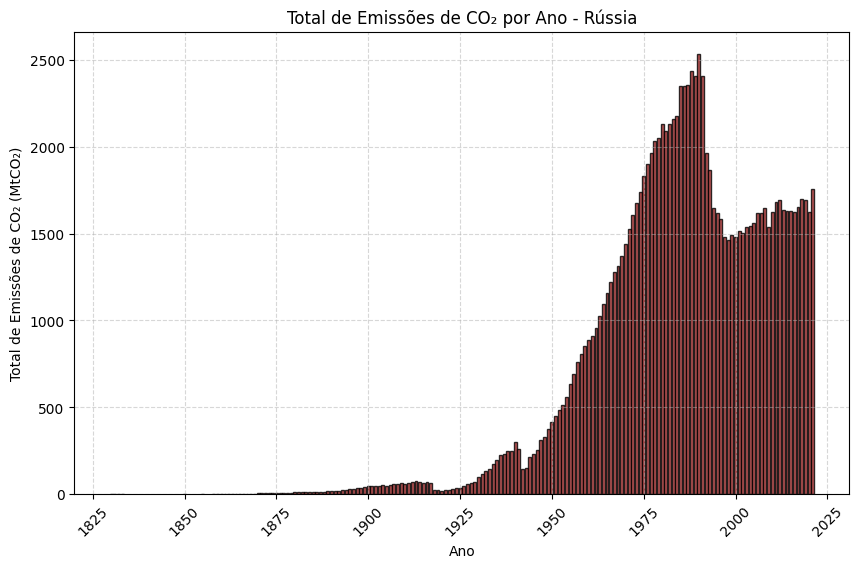

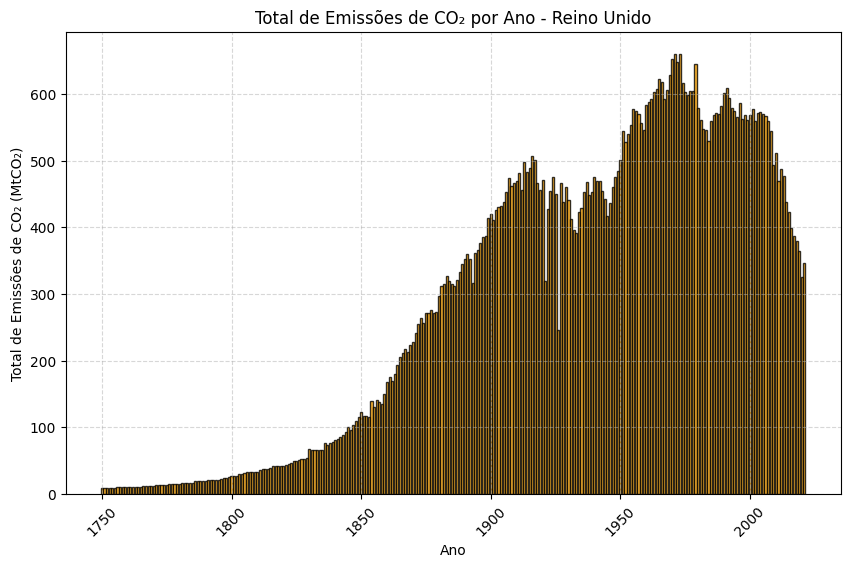

In [34]:
# Lista de DataFrames incluindo o Brasil, cinco maiores emissores e o total global
datasets = [df_global, df_brazil, df_china, df_usa, df_germany, df_russia, df_uk]  # Incluindo o dataset global
country_names = ['Global', 'Brasil', 'China', 'Estados Unidos', 'Alemanha', 'Rússia', 'Reino Unido']  # Nomes dos países correspondentes
colors = ['cyan', 'blue', 'green', 'red', 'purple', 'brown', 'orange']  # Cores para diferenciar os países

# Plotando o gráfico de barras para cada país
for i, (df, country) in enumerate(zip(datasets, country_names)):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Year'], df['Total'], color=colors[i],edgecolor='black', alpha=0.8)

    # Configurando o gráfico
    plt.title(f'Total de Emissões de CO₂ por Ano - {country}')
    plt.xlabel('Ano')
    plt.ylabel('Total de Emissões de CO₂ (MtCO₂)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)

    # Exibindo o gráfico
    plt.show()


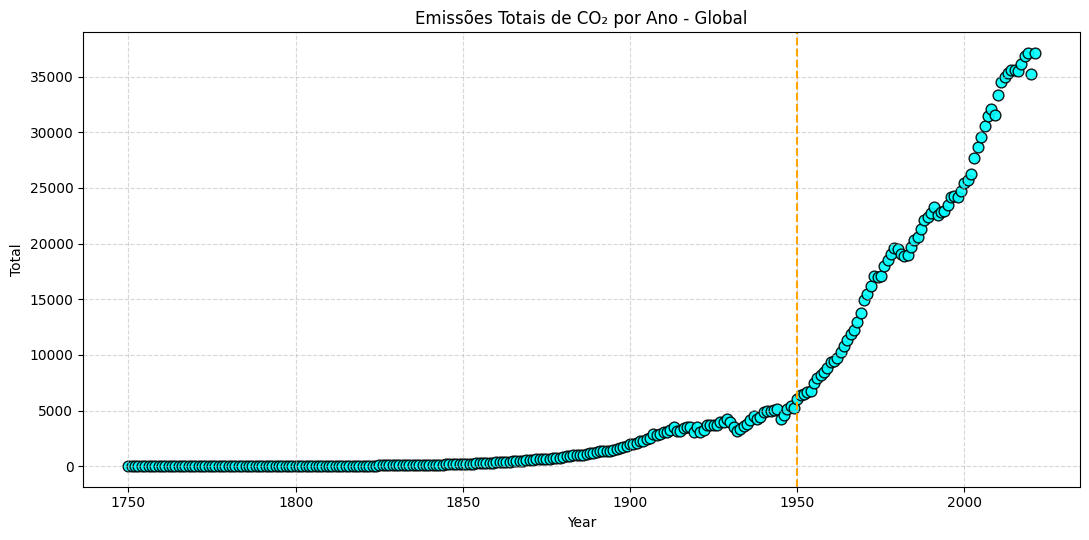

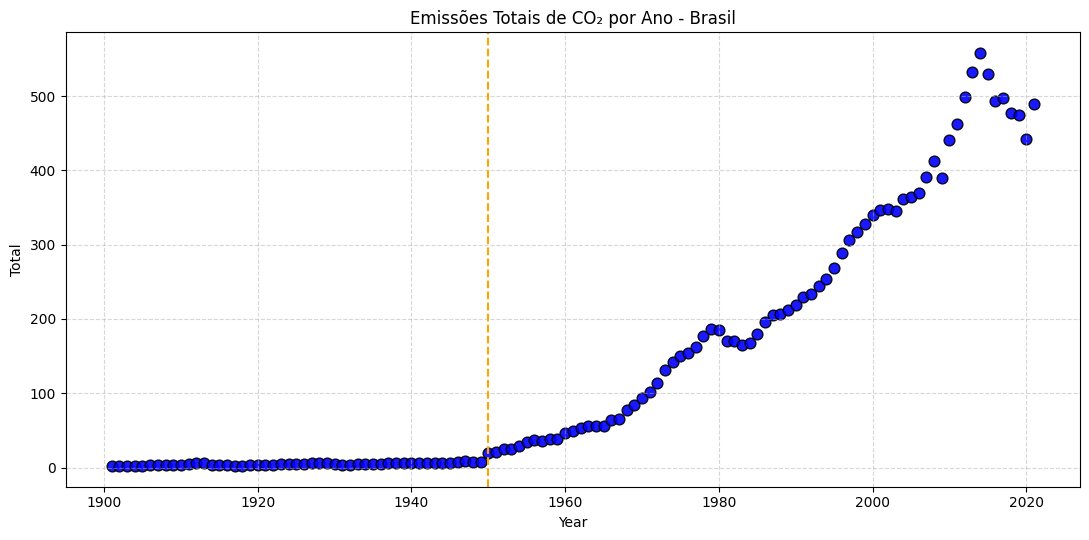

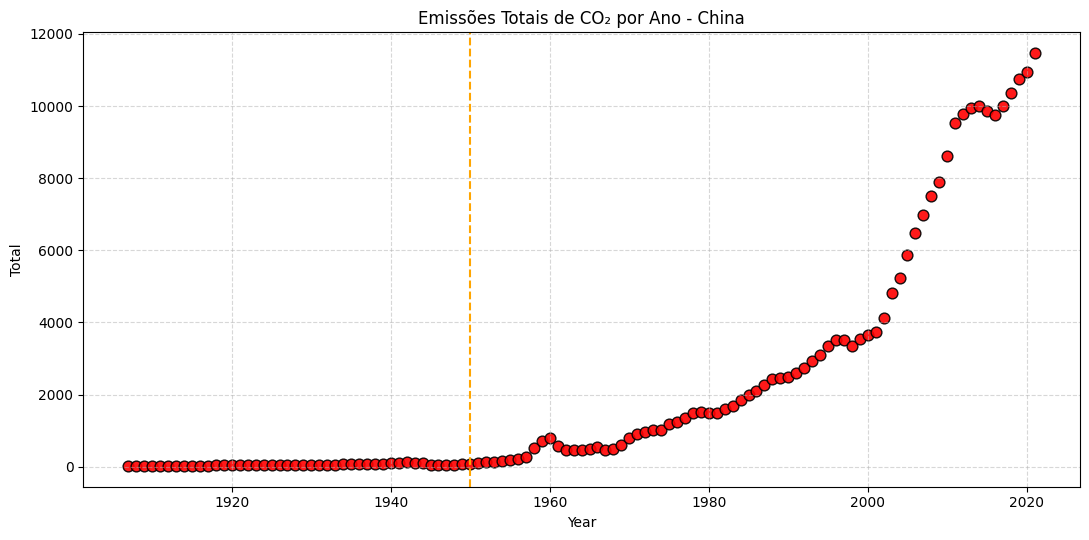

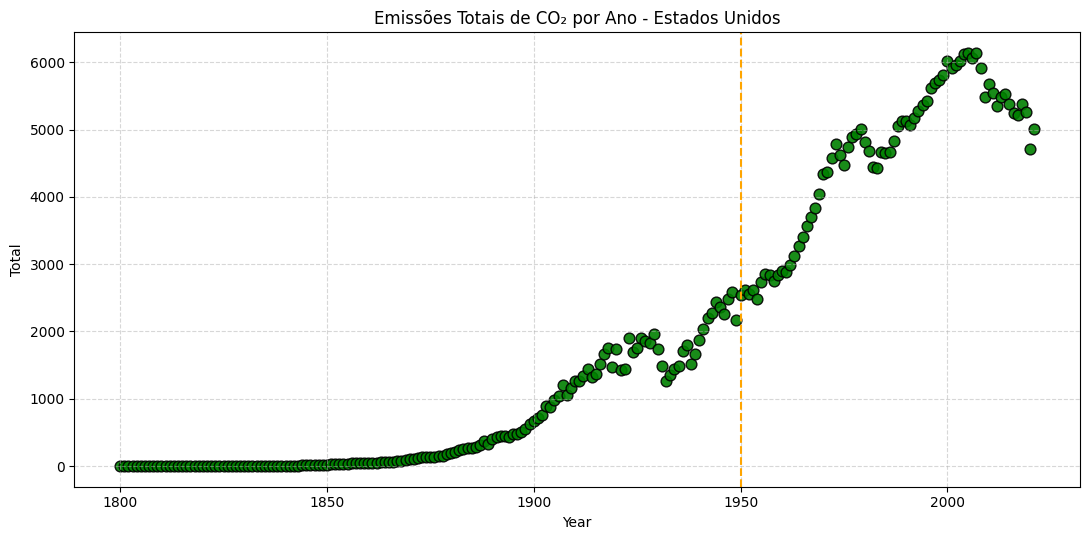

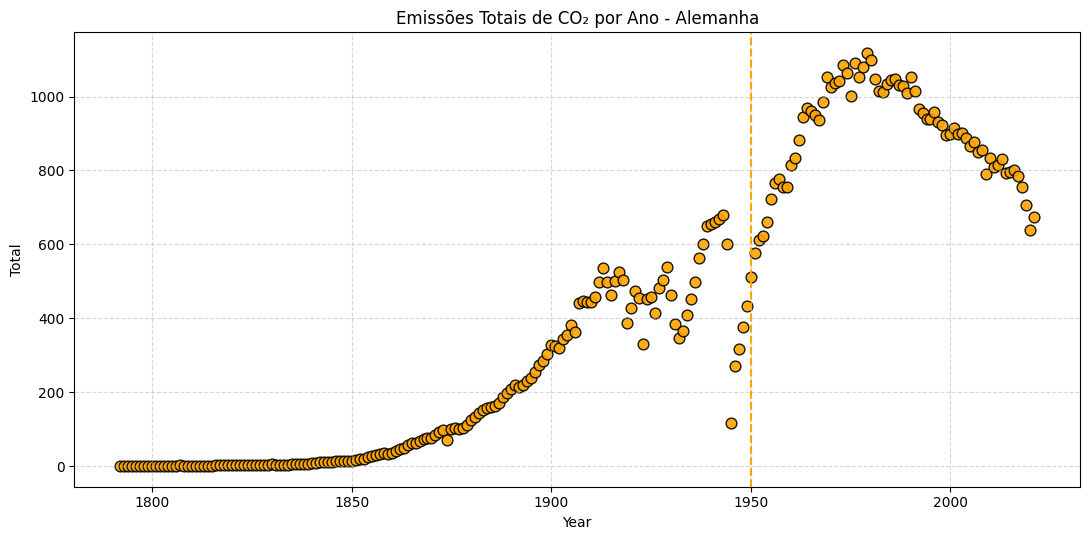

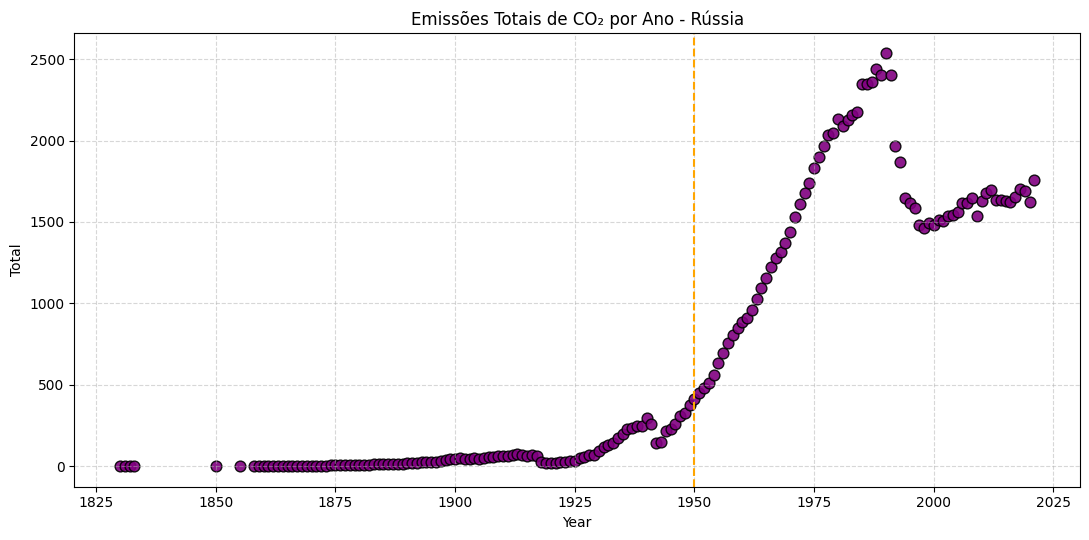

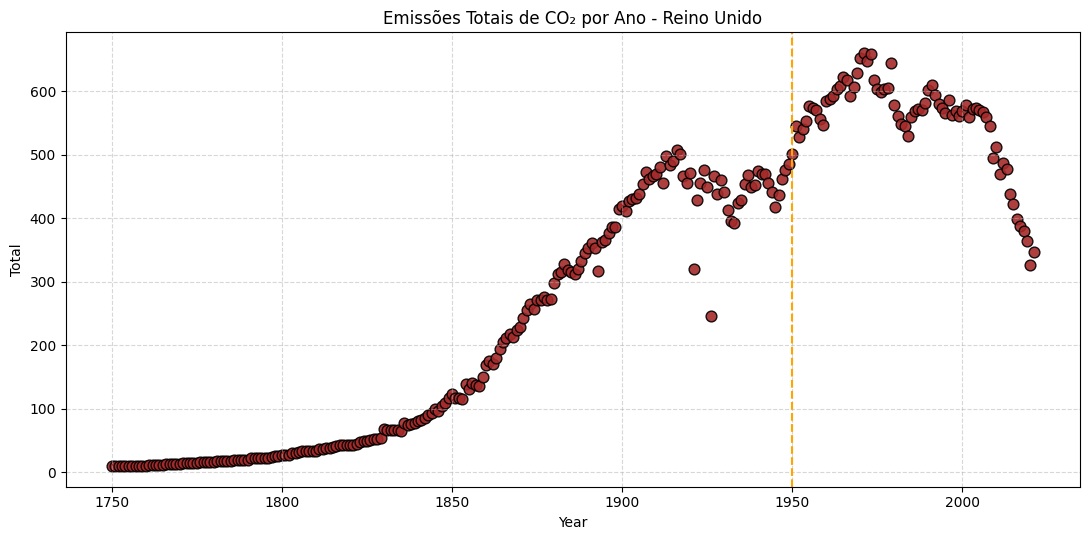

In [35]:
# Função para criar gráficos de dispersão para múltiplos datasets com cores diferentes
def create_multiple_scatter_plots(datasets, x_col, y_col, country_names):
    # Lista de cores para cada país
    colors = ['cyan', 'blue', 'red', 'green', 'orange', 'purple', 'brown']

    for df, country_name, color in zip(datasets, country_names, colors):
        plt.figure(figsize=(11, 5.5))  # Tamanho da figura

        # Criar o gráfico de dispersão com uma cor específica para o país
        plt.scatter(df[x_col], df[y_col], color=color, alpha=0.9, edgecolors='black', s=60)

        plt.axvline(x=1950, color='orange', linestyle='--')  # Linha de referência em 1950

        # Configurações do gráfico
        plt.title(f'Emissões Totais de CO₂ por Ano - {country_name}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()  # Ajustar layout

        # Exibir o gráfico
        plt.show()

# Lista de DataFrames incluindo o Brasil, cinco maiores emissores e o total global
datasets = [df_global, df_brazil, df_china, df_usa, df_germany, df_russia, df_uk]
country_names = ['Global', 'Brasil', 'China', 'Estados Unidos', 'Alemanha', 'Rússia', 'Reino Unido']

# Criar gráficos de dispersão para os maiores emissores, incluindo o Brasil com cores diferentes
create_multiple_scatter_plots(datasets, x_col='Year', y_col='Total', country_names=country_names)


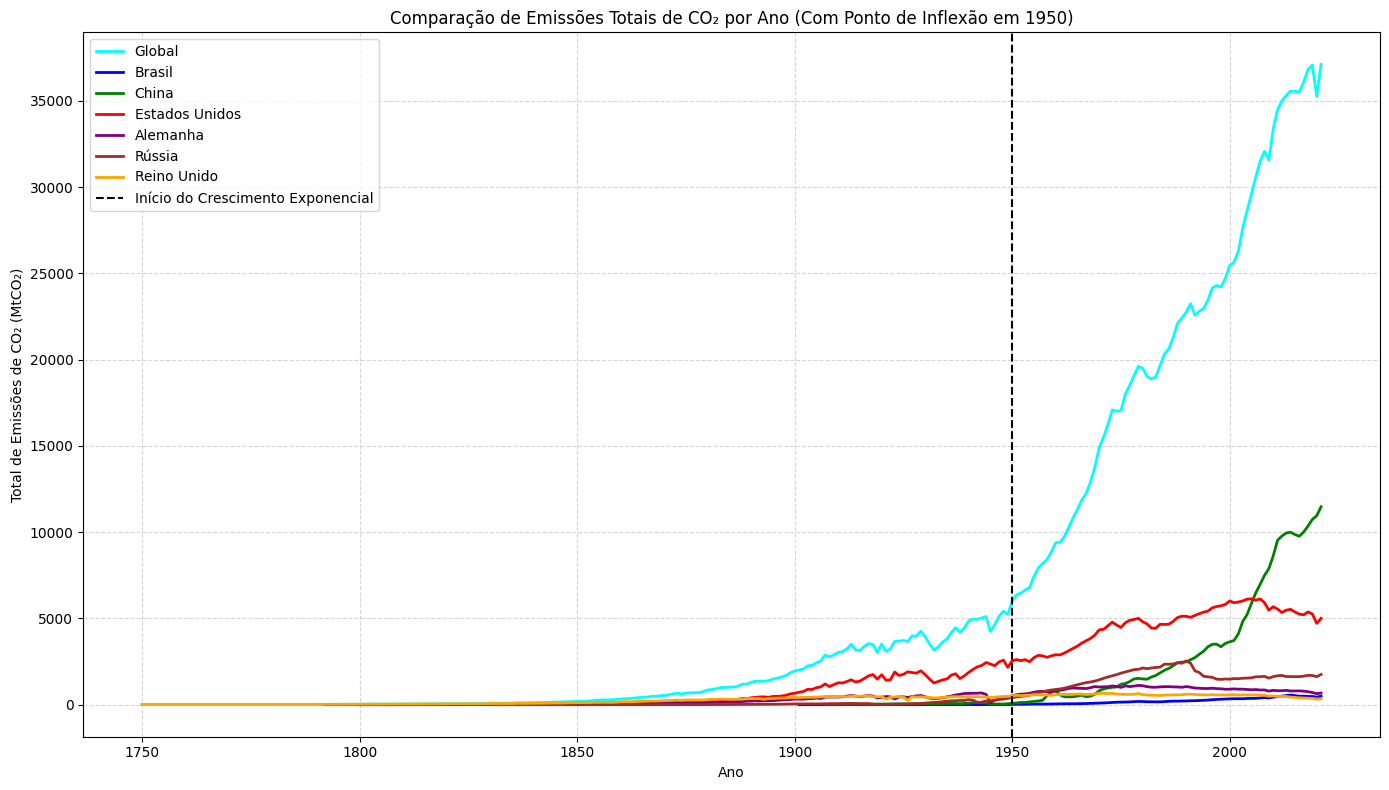

In [36]:

# Função para criar gráficos de linha para múltiplos datasets
def create_line_plots_with_inflection(datasets, x_col, y_col, country_names):
    plt.figure(figsize=(14, 8))  # Tamanho da figura

    # Lista de cores para as linhas
    colors = ['cyan', 'blue', 'green', 'red', 'purple', 'brown', 'orange']

    # Criar gráficos de linha para cada país
    for df, country, color in zip(datasets, country_names, colors):
        plt.plot(df[x_col], df[y_col], label=country, color=color, linewidth=2)

    # Adicionar uma linha vertical em 1950 para marcar o ponto de inflexão
    plt.axvline(x=1950, color='black', linestyle='--', label='Início do Crescimento Exponencial')

    # Configurações do gráfico
    plt.title('Comparação de Emissões Totais de CO₂ por Ano (Com Ponto de Inflexão em 1950)')
    plt.xlabel('Ano')
    plt.ylabel('Total de Emissões de CO₂ (MtCO₂)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # Ajustar layout

    # Exibir o gráfico
    plt.show()

# Lista de DataFrames incluindo o Brasil, cinco maiores emissores e o total global
datasets = [df_global, df_brazil, df_china, df_usa, df_germany, df_russia, df_uk]
country_names = ['Global', 'Brasil', 'China', 'Estados Unidos', 'Alemanha', 'Rússia', 'Reino Unido']

# Criar gráficos de linha para comparar as emissões ao longo dos anos, com o ponto de inflexão em 1950
create_line_plots_with_inflection(datasets, x_col='Year', y_col='Total', country_names=country_names)


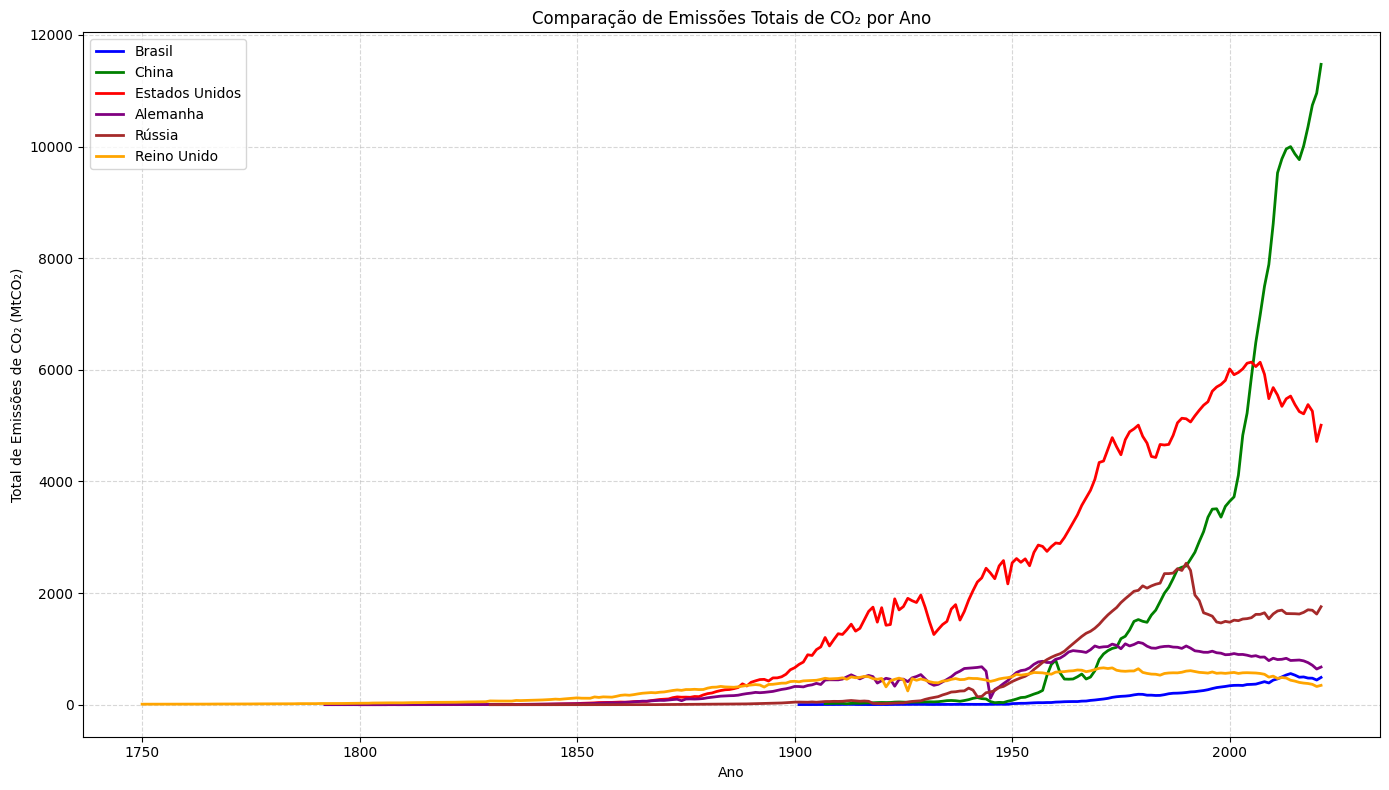

In [37]:

# Função para criar gráficos de linha para múltiplos datasets
def create_line_plots(datasets, x_col, y_col, country_names):
    plt.figure(figsize=(14, 8))  # Tamanho da figura

    # Lista de cores para as linhas
    colors = ['blue', 'green', 'red', 'purple', 'brown', 'orange']

    # Criar gráficos de linha para cada país
    for df, country, color in zip(datasets, country_names, colors):
        plt.plot(df[x_col], df[y_col], label=country, color=color, linewidth=2)

    # Configurações do gráfico
    plt.title('Comparação de Emissões Totais de CO₂ por Ano')
    plt.xlabel('Ano')
    plt.ylabel('Total de Emissões de CO₂ (MtCO₂)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # Ajustar layout

    # Exibir o gráfico
    plt.show()

# Lista de DataFrames incluindo o Brasil, cinco maiores emissores e o total global
datasets = [df_brazil, df_china, df_usa, df_germany, df_russia, df_uk]
country_names = ['Brasil', 'China', 'Estados Unidos', 'Alemanha', 'Rússia', 'Reino Unido']

# Criar gráficos de linha para comparar as emissões ao longo dos anos
create_line_plots(datasets, x_col='Year', y_col='Total', country_names=country_names)


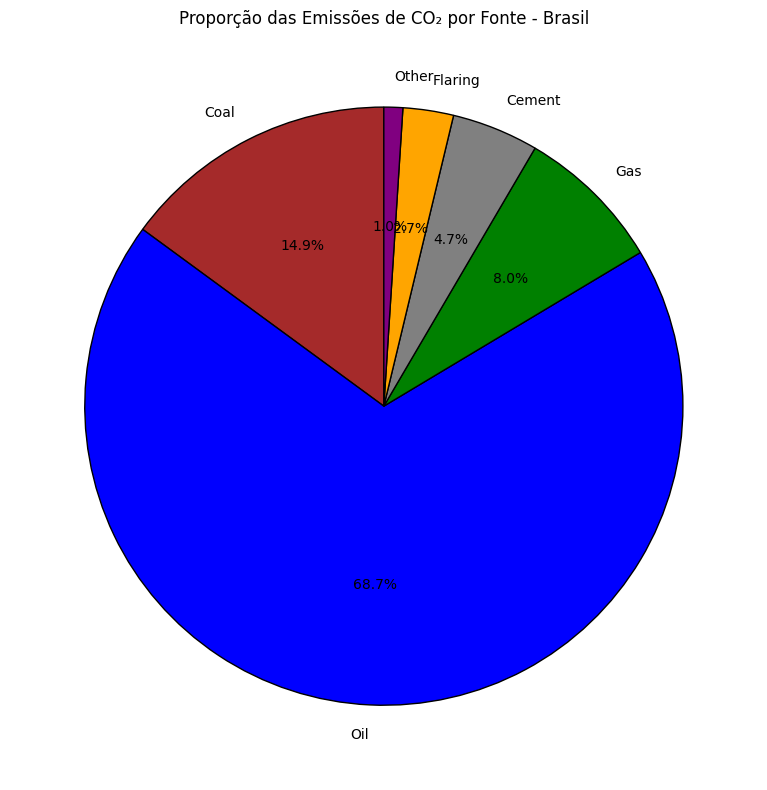

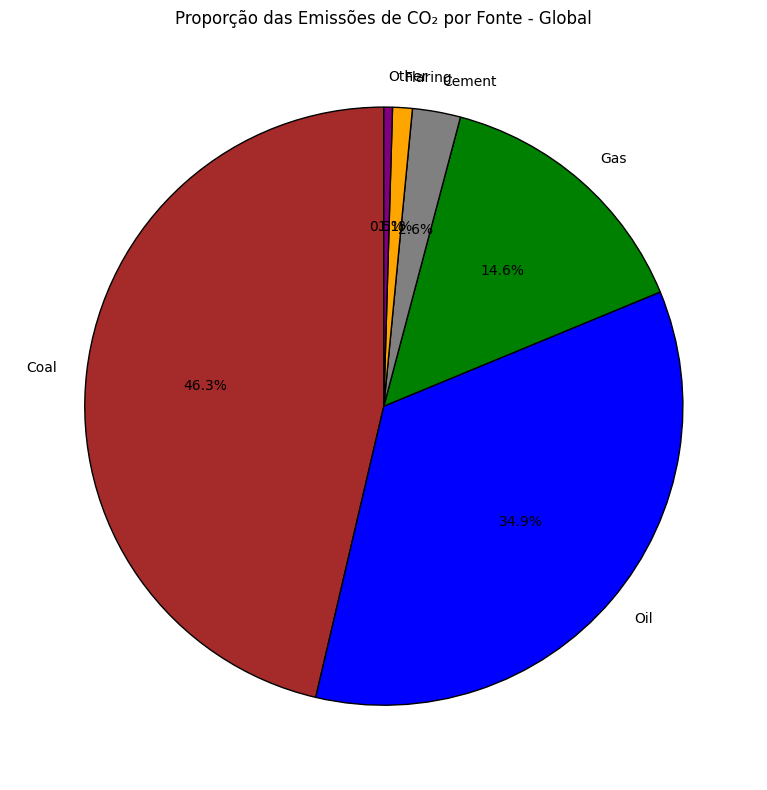

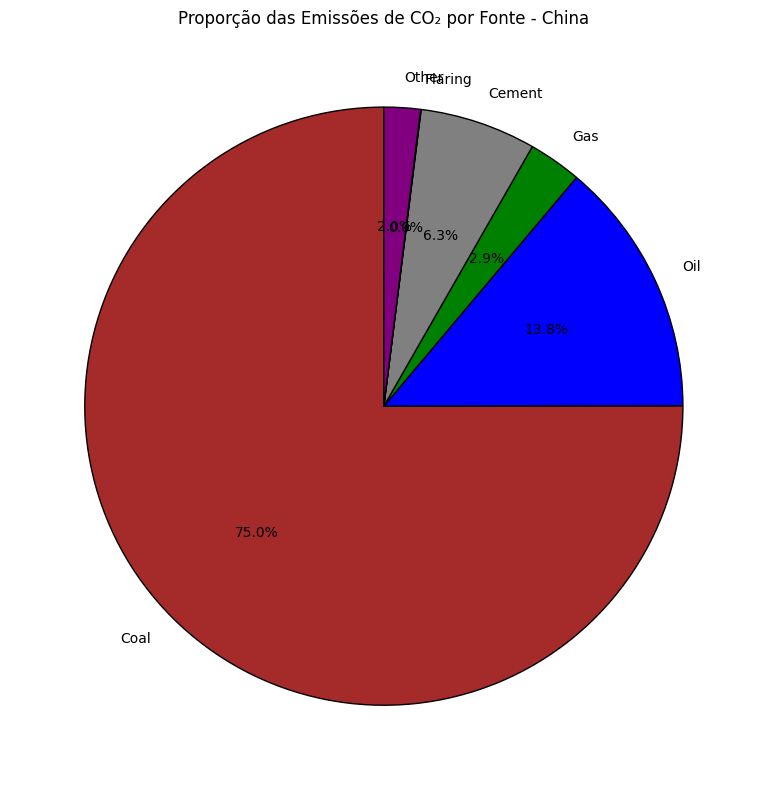

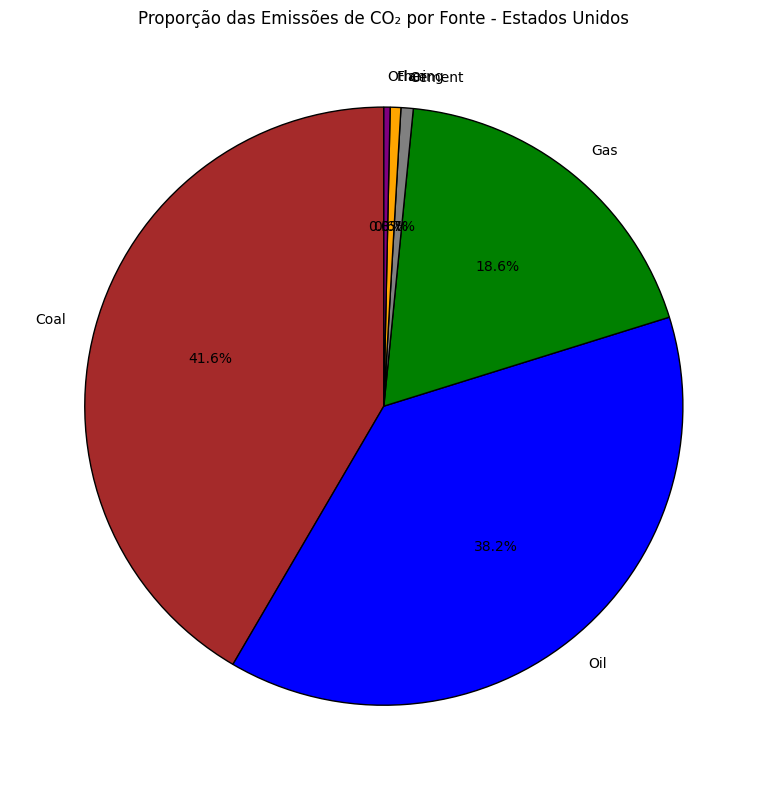

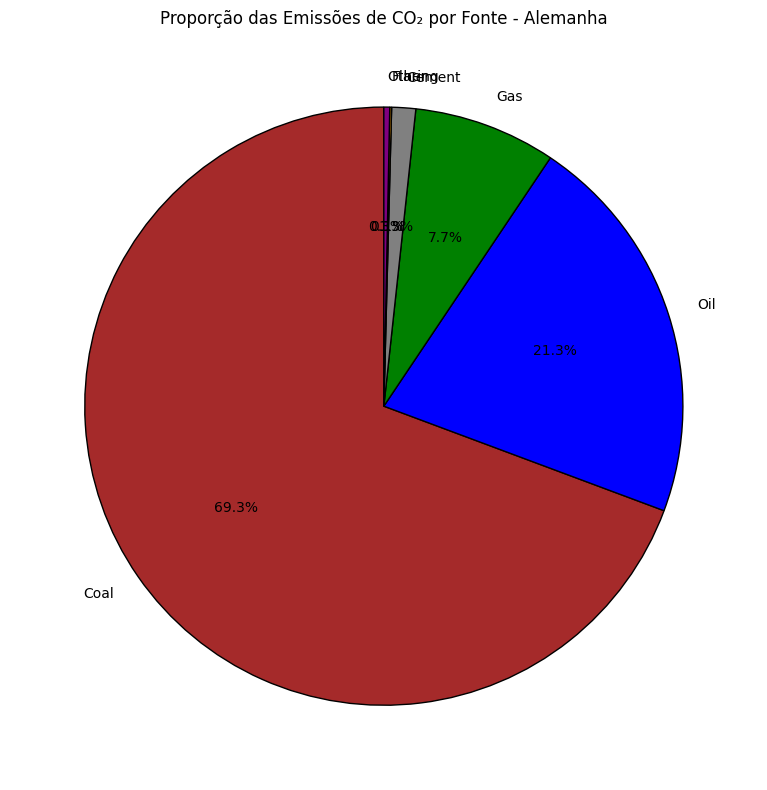

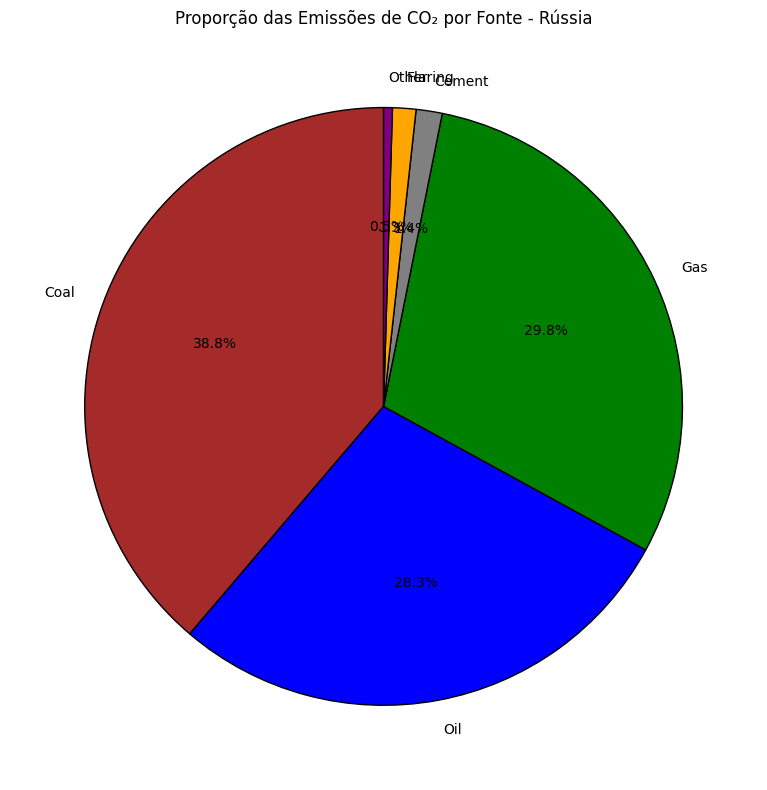

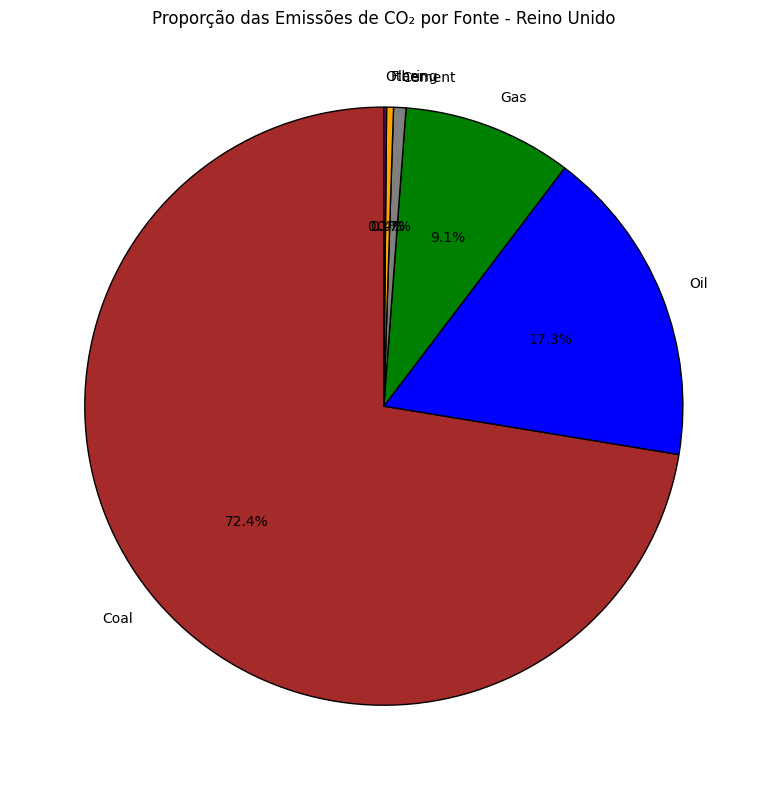

In [38]:
# Função para criar gráfico de pizza das emissões totais por fonte
def create_total_emissions_pie_chart(df, country_name):
    # Somar as emissões por fonte ao longo de todos os anos
    total_emissions = df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum()

    # Criar o gráfico de pizza
    plt.figure(figsize=(8, 8))
    plt.pie(total_emissions, labels=total_emissions.index, colors=['brown', 'blue', 'green', 'gray', 'orange', 'purple'],
            autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

    # Configurações do gráfico
    plt.title(f'Proporção das Emissões de CO₂ por Fonte - {country_name}')

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Gráfico para o Brasil
create_total_emissions_pie_chart(df_brazil, 'Brasil')
#Grafico para o Global
create_total_emissions_pie_chart(df_global, 'Global')

# China
create_total_emissions_pie_chart(df_china, 'China')

# Estados Unidos
create_total_emissions_pie_chart(df_usa, 'Estados Unidos')

# Alemanha
create_total_emissions_pie_chart(df_germany, 'Alemanha')

# Rússia
create_total_emissions_pie_chart(df_russia, 'Rússia')

# Reino Unido
create_total_emissions_pie_chart(df_uk, 'Reino Unido')


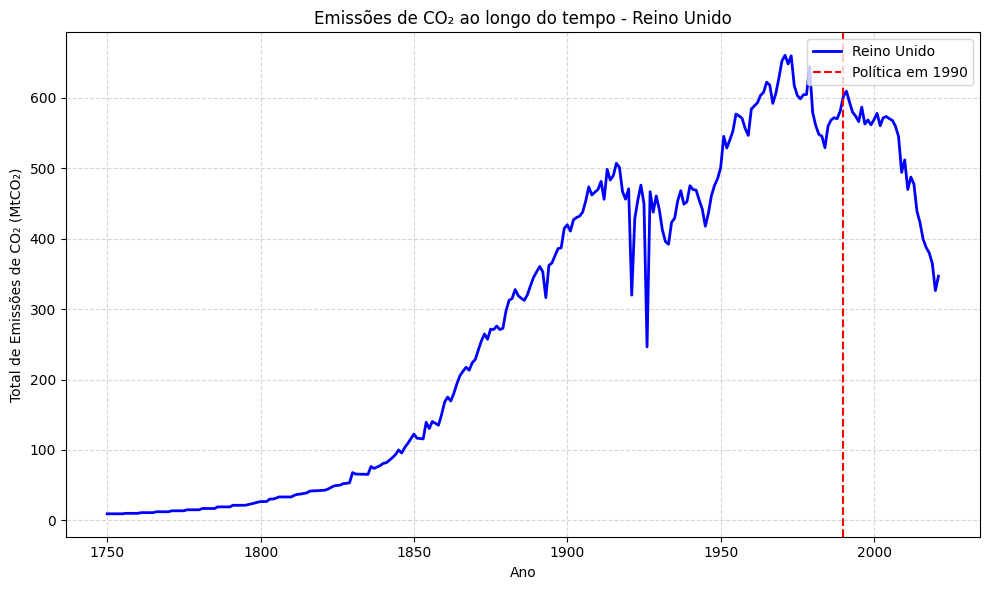

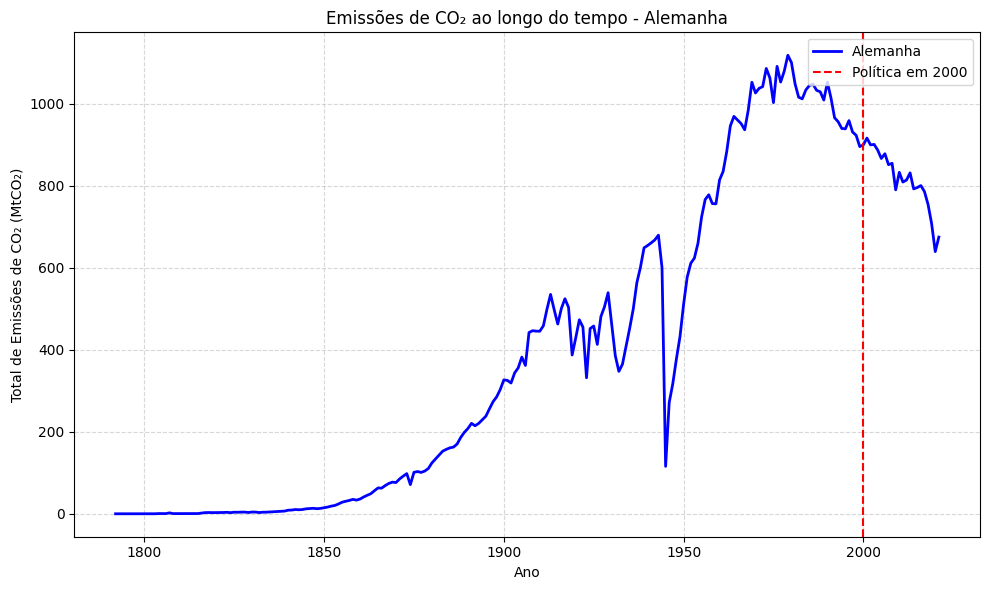

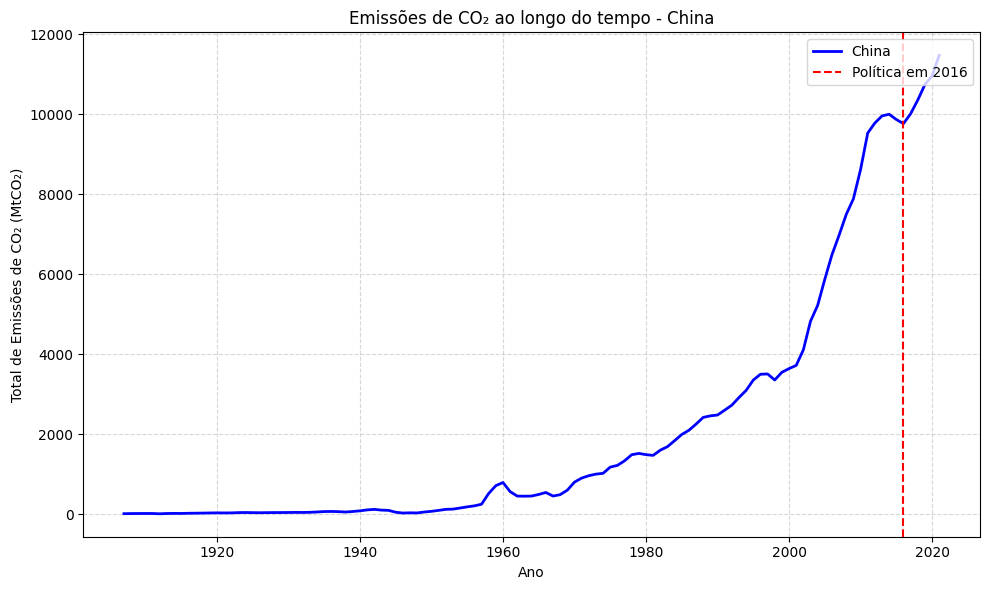

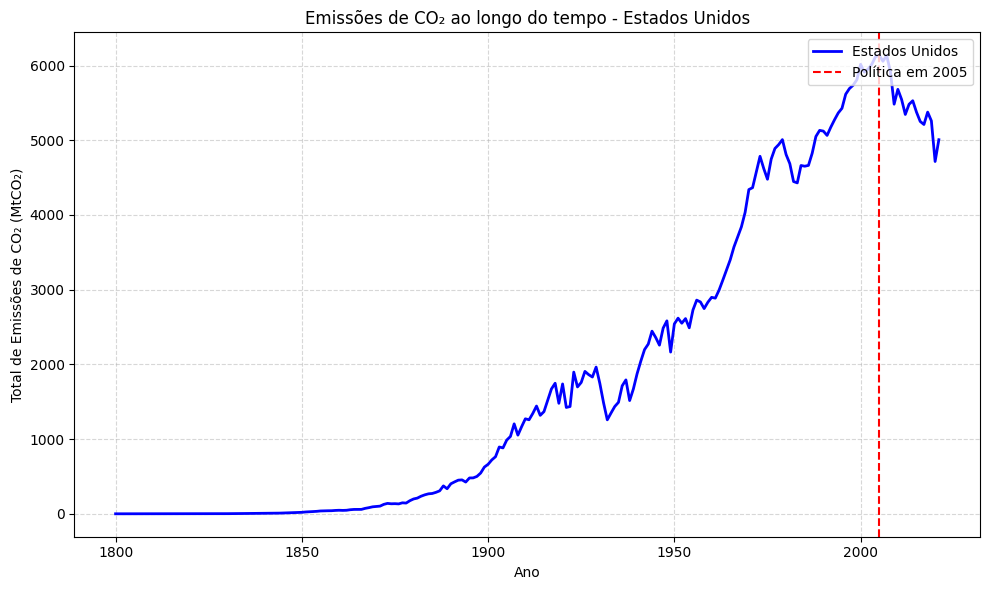

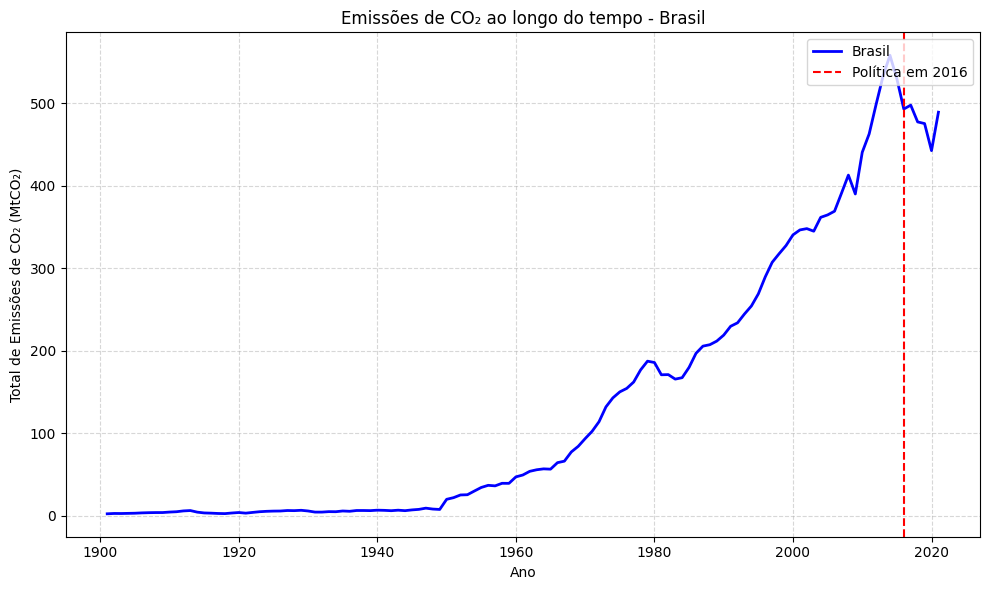

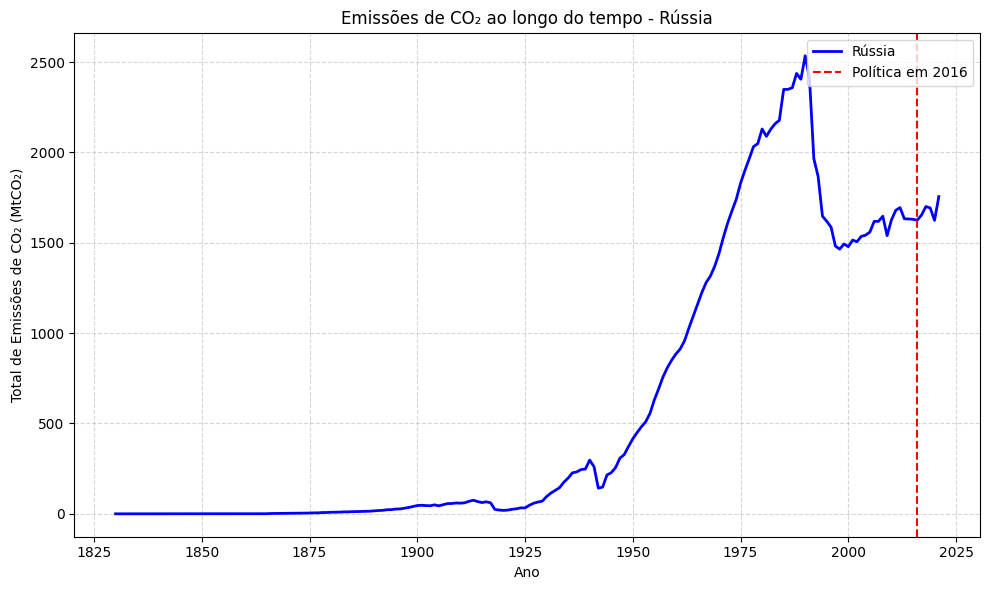

In [41]:
# Função para criar gráficos de linha com ponto de inflexão
def create_line_plots_with_policy_marker(df, x_col, y_col, country_name, policy_year):
    plt.figure(figsize=(10, 6))  # Tamanho da figura

    # Criar gráfico de linha para o país
    plt.plot(df[x_col], df[y_col], label=country_name, color='blue', linewidth=2)

    # Adicionar linha vertical no ano de implementação de políticas públicas
    plt.axvline(x=policy_year, color='red', linestyle='--', label=f'Política em {policy_year}')

    # Configurações do gráfico
    plt.title(f'Emissões de CO₂ ao longo do tempo - {country_name}')
    plt.xlabel('Ano')
    plt.ylabel('Total de Emissões de CO₂ (MtCO₂)')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # Ajustar layout

    # Exibir o gráfico
    plt.show()

# Gráficos para os países com seus respectivos anos de impacto
# Reino Unido (1990), Alemanha (2000)
create_line_plots_with_policy_marker(df_uk, 'Year', 'Total', 'Reino Unido', 1990)
create_line_plots_with_policy_marker(df_germany, 'Year', 'Total', 'Alemanha', 2000)
# China (sem grande impacto ainda, mas podemos traçar a linha de acordo com compromissos futuros)
create_line_plots_with_policy_marker(df_china, 'Year', 'Total', 'China', 2016)  # Acordo de Paris

# Estados Unidos (políticas estaduais, traçando uma linha a partir de 2005 com o Clean Air Act)
create_line_plots_with_policy_marker(df_usa, 'Year', 'Total', 'Estados Unidos', 2005)

# Brasil (ainda depende de políticas mais robustas, mas podemos marcar o ano da adesão ao Acordo de Paris)
create_line_plots_with_policy_marker(df_brazil, 'Year', 'Total', 'Brasil', 2016)

# Rússia (políticas ambientais limitadas, mas podemos marcar o Acordo de Paris como referência)
create_line_plots_with_policy_marker(df_russia, 'Year', 'Total', 'Rússia', 2016)


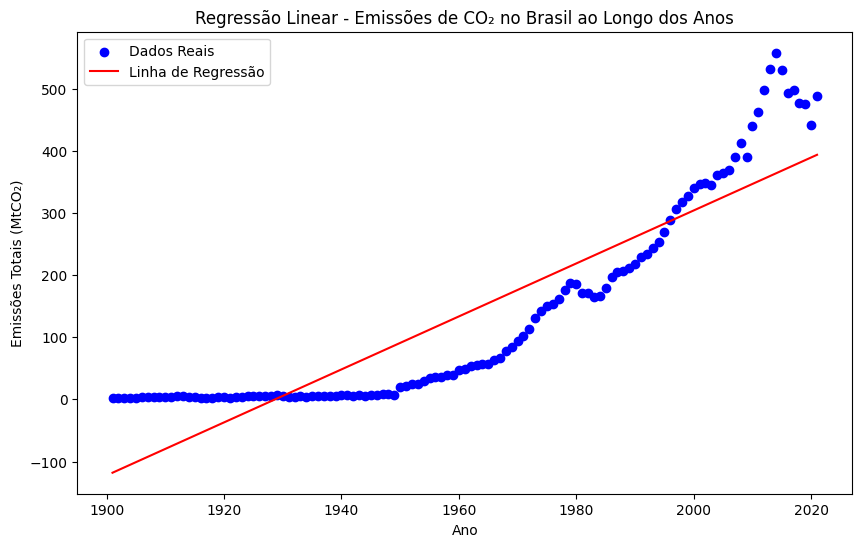

Coeficiente (Taxa de Crescimento Anual): 4.26390705429481
Intercepto (Emissões Iniciais): -8223.732990827493


In [40]:
# Preparar os dados para a regressão linear
X = df_brazil[['Year']]  # Variável independente: ano
y = df_brazil['Total']    # Variável dependente: emissões totais

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X, y)

# Prever as emissões com base no modelo ajustado
y_pred = model.predict(X)

# Coeficiente e intercepto da regressão
coeficiente = model.coef_[0]
intercepto = model.intercept_

# Visualizar os dados reais e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')  # Dados reais
plt.plot(X, y_pred, color='red', label='Linha de Regressão')  # Linha de regressão
plt.title('Regressão Linear - Emissões de CO₂ no Brasil ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões Totais (MtCO₂)')
plt.legend()
plt.show()

# Exibir o coeficiente e o intercepto
print(f"Coeficiente (Taxa de Crescimento Anual): {coeficiente}")
print(f"Intercepto (Emissões Iniciais): {intercepto}")


1. **Relação entre Fontes de Energia**:
   - **Observação**: Os grupos com altas emissões de CO₂ geralmente também têm altas emissões de carvão e gás.
   - **Insight**: Isso pode indicar que países que dependem fortemente de combustíveis fósseis estão mais propensos a ter altas emissões totais, o que levanta questões sobre a transição para energias renováveis.

2. **Desempenho dos Países em Desenvolvimento**:
   - **Observação**: Alguns países em desenvolvimento podem se agrupar com países desenvolvidos em termos de emissões per capita, apesar de suas emissões totais serem mais baixas.
   - **Insight**: Isso pode sugerir que a eficiência energética e as políticas ambientais têm um impacto significativo, independentemente do nível de desenvolvimento.

3. **Impacto das Políticas Ambientais**:
   - **Observação**: Países com políticas ambientais robustas tendem a se agrupar em clusters com emissões mais baixas.
   - **Insight**: Isso levanta a questão de quais políticas específicas estão contribuindo para a redução das emissões e como podem ser implementadas em outros países.